# SURVIVAL ANALYSIS

### AUTHORS: ALBERTO CASTELLANO MACIAS (100414242) &
### MOHAMED AFIF CHIFAOUI (100452024)




In this lab, you aim to run a simple survival analysis using the Bone marrow transplant: children dataset, which describes pediatric patients with several hematologic diseases. The dataset is publicly available in the UCI repository.

Steps:
1. Do some exploratory analysis to design the patient's features to be used. What features are missing, which do not seem to correlate with the survival time, and what groups of features are jointly correlated.

2. Given the set of features, run some clustering algorithms to separate the patients into groups. You can use Kmeans, DBScan, or any other. Clustering can be done over the input feature or a reduced space using PCA or a VAE.

3. Compute the survival function for each group using Kaplan-Meier and Cox Regression. Analyze the differences between both methods and the survival differences between groups. In terms of interpretability, recall that Cox provides a feature importance.

## 1. EXPLORATORY DATA ANALYSIS

### Import dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from scipy.io import arff
import pandas as pd
import numpy as np

#data = arff.loadarff('/content/drive/My Drive/ML Healthcare/bone+marrow+transplant+children/bone-marrow.arff')
data = arff.loadarff('/content/drive/My Drive/ML Healthcare/bone-marrow.arff')

df = pd.DataFrame(data[0])

df.head(50)

,Recipientgender,Stemcellsource,Donorage,Donorage35,IIIV,Gendermatch,DonorABO,RecipientABO,RecipientRh,ABOmatch,...,extcGvHD,CD34kgx10d6,CD3dCD34,CD3dkgx10d8,Rbodymass,ANCrecovery,PLTrecovery,time_to_aGvHD_III_IV,survival_time,survival_status
0,b'1',b'1',22.830137,b'0',b'1',b'0',b'1',b'1',b'1',b'0',...,b'1',7.20,1.338760,5.38,35.00,19.0,51.0,32.0,999.0,0.0
1,b'1',b'0',23.342466,b'0',b'1',b'0',b'-1',b'-1',b'1',b'0',...,b'1',4.50,11.078295,0.41,20.60,16.0,37.0,1000000.0,163.0,1.0
2,b'1',b'0',26.394521,b'0',b'1',b'0',b'-1',b'-1',b'1',b'0',...,b'1',7.94,19.013230,0.42,23.40,23.0,20.0,1000000.0,435.0,1.0
3,b'0',b'0',39.684932,b'1',b'1',b'0',b'1',b'2',b'1',b'1',...,b'?',4.25,29.481647,0.14,50.00,23.0,29.0,19.0,53.0,1.0
4,b'0',b'1',33.358904,b'0',b'0',b'0',b'1',b'2',b'0',b'1',...,b'1',51.85,3.972255,13.05,9.00,14.0,14.0,1000000.0,2043.0,0.0
5,b'1',b'0',27.391781,b'0',b'0',b'0',b'2',b'0',b'1',b'1',...,b'1',3.27,8.412758,0.39,40.00,16.0,70.0,1000000.0,2800.0,0.0
6,b'0',b'1',34.520548,b'0',b'1',b'0',b'0',b'1',b'0',b'1',...,b'?',17.78,2.406248,7.39,51.00,17.0,29.0,18.0,41.0,1.0
7,b'1',b'0',21.435616,b'0',b'1',b'0',b'0',b'1',b'1',b'1',...,b'?',6.41,NaN,NaN,56.00,22.0,58.0,22.0,45.0,1.0
8,b'1',b'1',32.641096,b'0',b'0',b'0',b'2',b'0',b'1',b'1',...,b'1',23.54,3.772555,6.24,20.50,15.0,14.0,1000000.0,671.0,0.0
9,b'1',b'1',28.783562,b'0',b'1',b'1',b'1',b'0',b'1',b'1',...,b'1',7.69,1.035244,7.43,16.50,16.0,17.0,1000000.0,676.0,0.0


In [ ]:
print(len(df)) # rows

187


In [ ]:
print(df.columns) # column headers

Index(['Recipientgender', 'Stemcellsource', 'Donorage', 'Donorage35', 'IIIV',
       'Gendermatch', 'DonorABO', 'RecipientABO', 'RecipientRh', 'ABOmatch',
       'CMVstatus', 'DonorCMV', 'RecipientCMV', 'Disease', 'Riskgroup',
       'Txpostrelapse', 'Diseasegroup', 'HLAmatch', 'HLAmismatch', 'Antigen',
       'Alel', 'HLAgrI', 'Recipientage', 'Recipientage10', 'Recipientageint',
       'Relapse', 'aGvHDIIIIV', 'extcGvHD', 'CD34kgx10d6', 'CD3dCD34',
       'CD3dkgx10d8', 'Rbodymass', 'ANCrecovery', 'PLTrecovery',
       'time_to_aGvHD_III_IV', 'survival_time', 'survival_status'],
      dtype='object')


In [ ]:
print("Data types of all columns:")  # data types
print(df.dtypes)

Data types of all columns:
Recipientgender          object
Stemcellsource           object
Donorage                float64
Donorage35               object
IIIV                     object
Gendermatch              object
DonorABO                 object
RecipientABO             object
RecipientRh              object
ABOmatch                 object
CMVstatus                object
DonorCMV                 object
RecipientCMV             object
Disease                  object
Riskgroup                object
Txpostrelapse            object
Diseasegroup             object
HLAmatch                 object
HLAmismatch              object
Antigen                  object
Alel                     object
HLAgrI                   object
Recipientage            float64
Recipientage10           object
Recipientageint          object
Relapse                  object
aGvHDIIIIV               object
extcGvHD                 object
CD34kgx10d6             float64
CD3dCD34                float64
CD3dkgx10d8  

In [ ]:
categorical_columns = df.select_dtypes(include=['object']).columns
print("Categorical Columns:")
print(categorical_columns)

Categorical Columns:
Index(['Recipientgender', 'Stemcellsource', 'Donorage35', 'IIIV',
       'Gendermatch', 'DonorABO', 'RecipientABO', 'RecipientRh', 'ABOmatch',
       'CMVstatus', 'DonorCMV', 'RecipientCMV', 'Disease', 'Riskgroup',
       'Txpostrelapse', 'Diseasegroup', 'HLAmatch', 'HLAmismatch', 'Antigen',
       'Alel', 'HLAgrI', 'Recipientage10', 'Recipientageint', 'Relapse',
       'aGvHDIIIIV', 'extcGvHD'],
      dtype='object')


### Missing values




In [ ]:
missing_values = df.isnull().sum()
missing_values = missing_values.sort_values(ascending=False)
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
CD3dkgx10d8             5
CD3dCD34                5
Rbodymass               2
Recipientgender         0
aGvHDIIIIV              0
HLAgrI                  0
Recipientage            0
Recipientage10          0
Recipientageint         0
Relapse                 0
CD34kgx10d6             0
extcGvHD                0
Antigen                 0
ANCrecovery             0
PLTrecovery             0
time_to_aGvHD_III_IV    0
survival_time           0
Alel                    0
HLAmismatch             0
Stemcellsource          0
HLAmatch                0
Donorage                0
Donorage35              0
IIIV                    0
Gendermatch             0
DonorABO                0
RecipientABO            0
RecipientRh             0
ABOmatch                0
CMVstatus               0
DonorCMV                0
RecipientCMV            0
Disease                 0
Riskgroup               0
Txpostrelapse           0
Diseasegroup            0
survival_status         0
dtype: 

In [ ]:
# Drop rows with missing values
df.dropna(inplace=True)

print(len(df))

182


### Inspect columns

In [ ]:
column_name = 'survival_status'

# Count the number of unique texts
unique_texts_count = df[column_name].value_counts()

print("Number of different texts in column '{}':".format(column_name))
print(unique_texts_count)

Number of different texts in column 'survival_status':
0.0    101
1.0     81
Name: survival_status, dtype: int64


101 instances as **0.0** (did not survive) & 81 instances as **1.0** (did survive)

Categorical variables

In [ ]:
for i in categorical_columns:
    # Count the number of unique texts
    unique_texts_count = df[i].value_counts()

    print("Number of different texts in column '{}':".format(i))
    print(unique_texts_count)

Number of different texts in column 'Recipientgender':
b'1'    109
b'0'     73
Name: Recipientgender, dtype: int64
Number of different texts in column 'Stemcellsource':
b'1'    142
b'0'     40
Name: Stemcellsource, dtype: int64
Number of different texts in column 'Donorage35':
b'0'    100
b'1'     82
Name: Donorage35, dtype: int64
Number of different texts in column 'IIIV':
b'1'    109
b'0'     73
Name: IIIV, dtype: int64
Number of different texts in column 'Gendermatch':
b'0'    151
b'1'     31
Name: Gendermatch, dtype: int64
Number of different texts in column 'DonorABO':
b'1'     70
b'0'     70
b'-1'    27
b'2'     15
Name: DonorABO, dtype: int64
Number of different texts in column 'RecipientABO':
b'1'     73
b'-1'    49
b'0'     46
b'2'     13
b'?'      1
Name: RecipientABO, dtype: int64
Number of different texts in column 'RecipientRh':
b'1'    154
b'0'     26
b'?'      2
Name: RecipientRh, dtype: int64
Number of different texts in column 'ABOmatch':
b'1'    131
b'0'     50
b'?'  

In [ ]:
# Replace "b'?' " with np.nan
df.replace(b'?', np.nan, inplace=True)

# Drop rows with np.nan values
df.dropna(axis=0, inplace=True)

print(len(df))

142


In [ ]:
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True) #one-hot encoding for categorical variables
df.head()

,Donorage,Recipientage,CD34kgx10d6,CD3dCD34,CD3dkgx10d8,Rbodymass,ANCrecovery,PLTrecovery,time_to_aGvHD_III_IV,survival_time,...,HLAgrI_b'3',HLAgrI_b'4',HLAgrI_b'5',HLAgrI_b'7',Recipientage10_b'1',Recipientageint_b'1',Recipientageint_b'2',Relapse_b'1',aGvHDIIIIV_b'1',extcGvHD_b'1'
0,22.830137,9.6,7.20,1.338760,5.38,35.0,19.0,51.0,32.0,999.0,...,0,0,0,0,0,1,0,0,0,1
1,23.342466,4.0,4.50,11.078295,0.41,20.6,16.0,37.0,1000000.0,163.0,...,0,0,0,0,0,0,0,1,1,1
2,26.394521,6.6,7.94,19.013230,0.42,23.4,23.0,20.0,1000000.0,435.0,...,0,0,0,0,0,1,0,1,1,1
4,33.358904,1.3,51.85,3.972255,13.05,9.0,14.0,14.0,1000000.0,2043.0,...,0,0,0,0,0,0,0,0,1,1
8,32.641096,7.9,23.54,3.772555,6.24,20.5,15.0,14.0,1000000.0,671.0,...,0,0,0,0,0,1,0,0,1,1


In [ ]:
df.columns

Index(['Donorage', 'Recipientage', 'CD34kgx10d6', 'CD3dCD34', 'CD3dkgx10d8',
       'Rbodymass', 'ANCrecovery', 'PLTrecovery', 'time_to_aGvHD_III_IV',
       'survival_time', 'survival_status', 'Recipientgender_b'1'',
       'Stemcellsource_b'1'', 'Donorage35_b'1'', 'IIIV_b'1'',
       'Gendermatch_b'1'', 'DonorABO_b'0'', 'DonorABO_b'1'', 'DonorABO_b'2'',
       'RecipientABO_b'0'', 'RecipientABO_b'1'', 'RecipientABO_b'2'',
       'RecipientRh_b'1'', 'ABOmatch_b'1'', 'CMVstatus_b'1'', 'CMVstatus_b'2'',
       'CMVstatus_b'3'', 'DonorCMV_b'1'', 'RecipientCMV_b'1'',
       'Disease_b'AML'', 'Disease_b'chronic'', 'Disease_b'lymphoma'',
       'Disease_b'nonmalignant'', 'Riskgroup_b'1'', 'Txpostrelapse_b'1'',
       'Diseasegroup_b'1'', 'HLAmatch_b'1'', 'HLAmatch_b'2'', 'HLAmatch_b'3'',
       'HLAmismatch_b'1'', 'Antigen_b'0'', 'Antigen_b'1'', 'Antigen_b'2'',
       'Alel_b'0'', 'Alel_b'1'', 'Alel_b'2'', 'Alel_b'3'', 'HLAgrI_b'1'',
       'HLAgrI_b'2'', 'HLAgrI_b'3'', 'HLAgrI_b'4'', 'HLAg

We went from 37 columns to 59 columns in our dataset

### Correlation

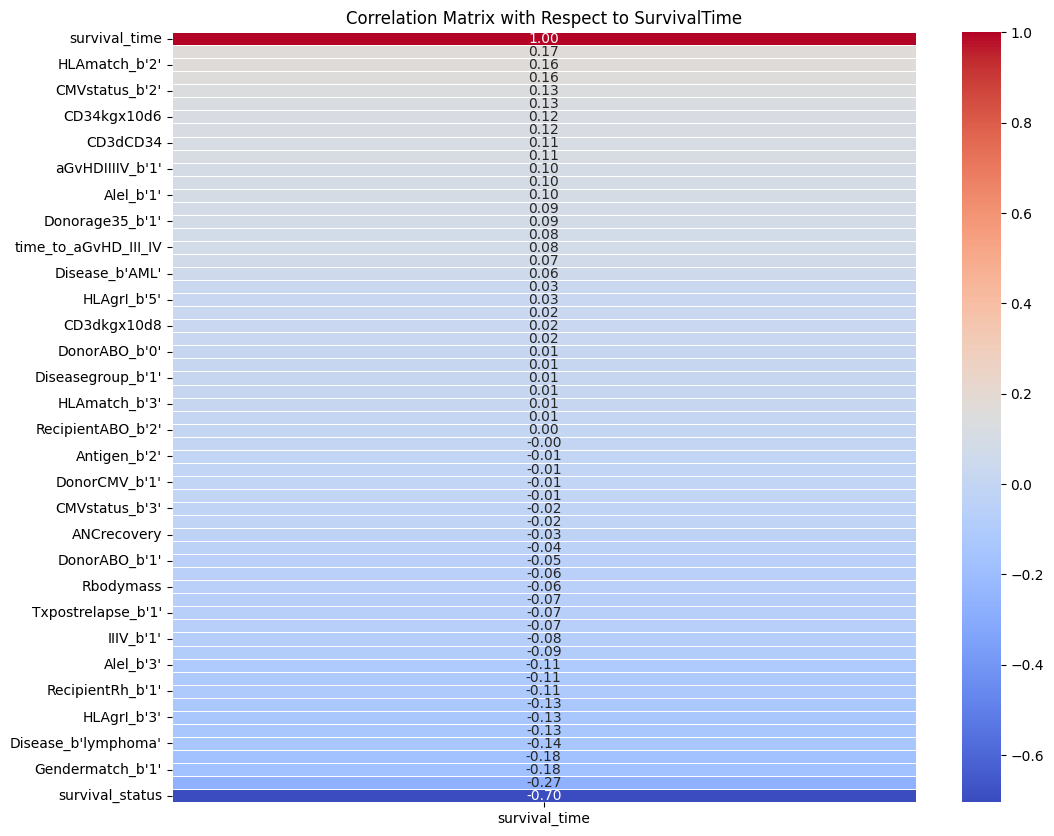

Correlation with 'SurvivalTime':
survival_time              1.000000
survival_status            0.704149
Relapse_b'1'               0.268003
Gendermatch_b'1'           0.177157
PLTrecovery                0.175062
HLAgrI_b'4'                0.167106
HLAmatch_b'2'              0.163200
HLAmismatch_b'1'           0.157170
Disease_b'lymphoma'        0.138383
CMVstatus_b'2'             0.134651
Stemcellsource_b'1'        0.132159
HLAgrI_b'3'                0.131942
Antigen_b'1'               0.126421
Recipientgender_b'1'       0.125906
CD34kgx10d6                0.120058
DonorABO_b'2'              0.115171
RecipientRh_b'1'           0.114522
RecipientABO_b'1'          0.113159
CD3dCD34                   0.112188
RecipientCMV_b'1'          0.111437
Alel_b'3'                  0.106366
aGvHDIIIIV_b'1'            0.100023
Donorage                   0.098170
Alel_b'1'                  0.097796
Alel_b'2'                  0.089281
Donorage35_b'1'            0.087530
Riskgroup_b'1'             0.08

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation with 'SurvivalTime'
correlation_matrix = df.corr()

# Plot the correlation matrix heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix[['survival_time']].sort_values(by='survival_time', ascending=False),
            annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix with Respect to SurvivalTime')
plt.show()

# Analyze the correlation with 'survival_time'
correlation_with_survival = correlation_matrix['survival_time'].sort_values(ascending=False)
print("Correlation with 'SurvivalTime':")
correlation_with_survival = df.corr()['survival_time'].abs().sort_values(ascending=False)
print(correlation_with_survival)


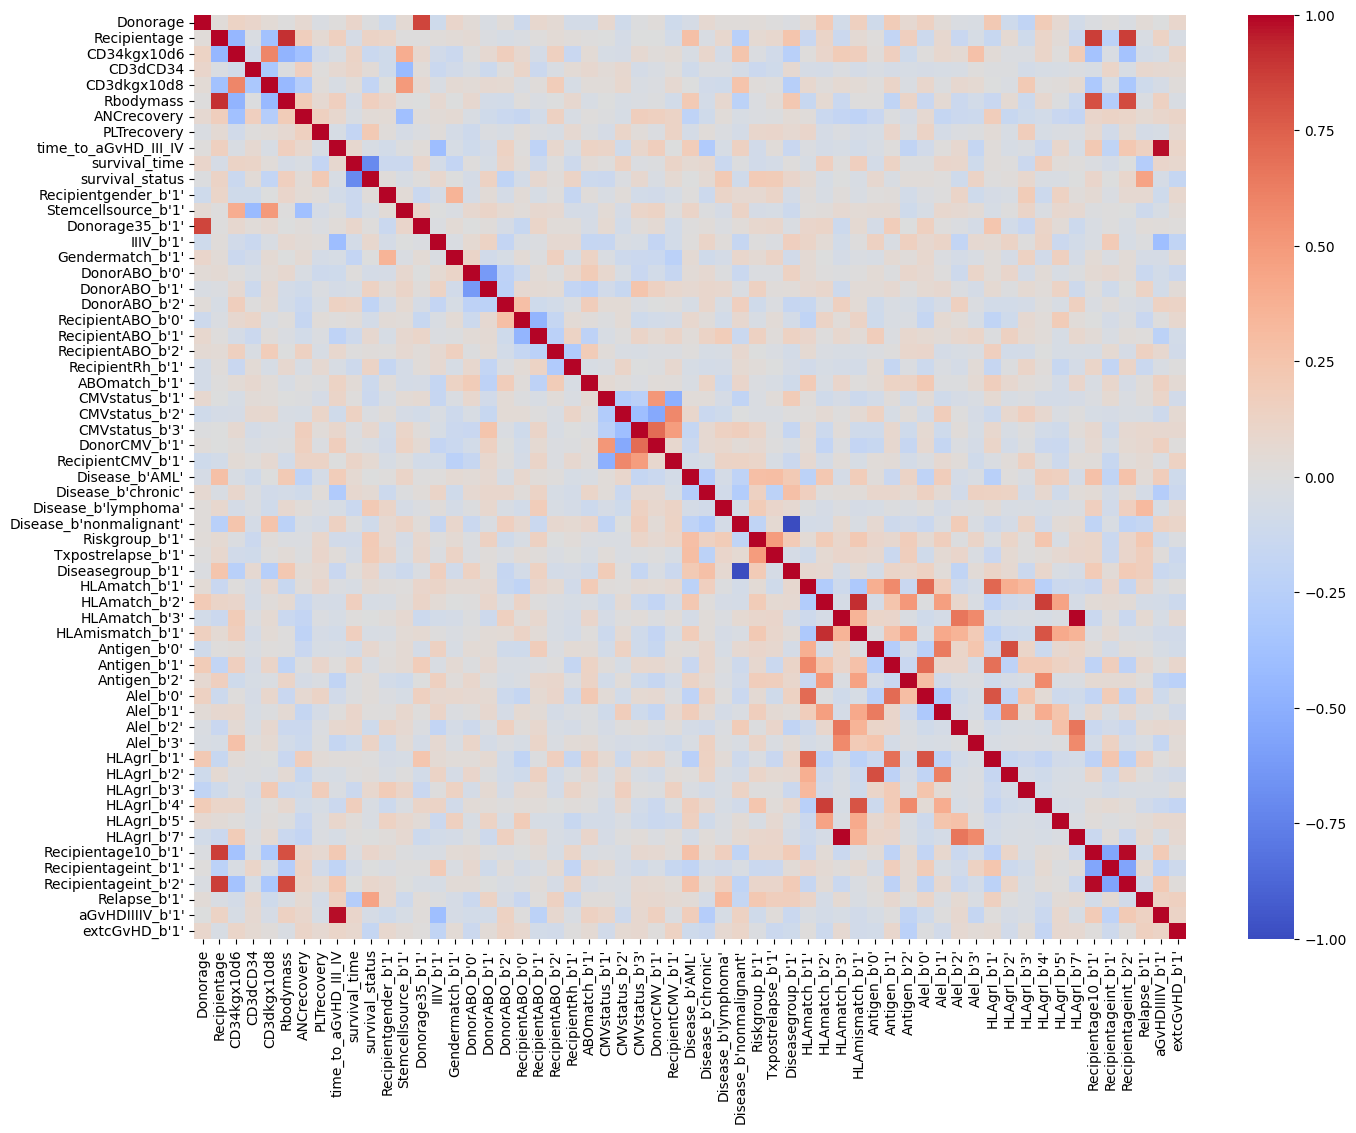

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation with 'SurvivalTime'
corr_matrix = df.corr()

# Set up matplotlib figure
plt.figure(figsize=(16, 12))

# Create a heatmap with seaborn
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.show()

## 2. CLUSTERING

We get the relevant features and standardize them

In [ ]:
from sklearn.preprocessing import StandardScaler

# Automatically select features with correlation above a threshold
correlation_threshold = 0.2  # Adjust this threshold based on your preference
relevant_features = correlation_matrix[correlation_matrix['survival_time'].abs() > correlation_threshold].index

# Select only the relevant features from the DataFrame
selected_features = df[relevant_features]

# Standardize the features
scaler = StandardScaler()
selected_features_scaled = scaler.fit_transform(selected_features)

In [ ]:
print(selected_features)

     survival_time  survival_status  Relapse_b'1'
0            999.0              0.0             0
1            163.0              1.0             1
2            435.0              1.0             1
4           2043.0              0.0             0
8            671.0              0.0             0
..             ...              ...           ...
179         1627.0              0.0             0
182          385.0              1.0             1
183          634.0              1.0             0
184         1895.0              0.0             0
185          382.0              1.0             0

[142 rows x 3 columns]


### K-Means & PCA

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


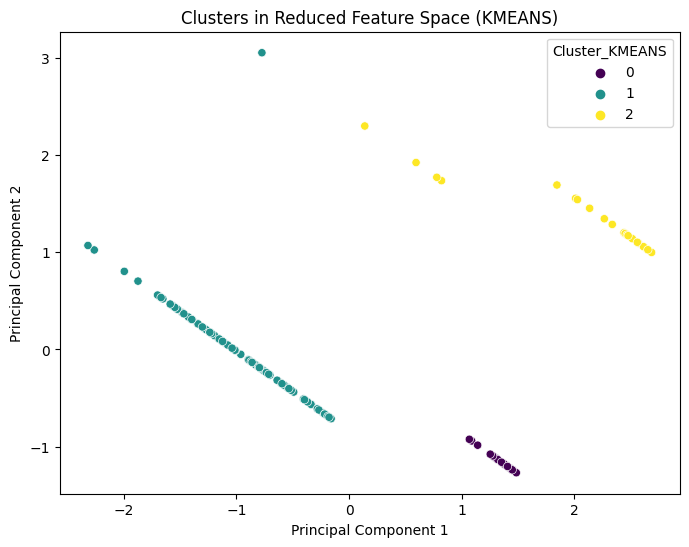

In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Visualize clusters with PCA
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(selected_features_scaled)

# Clustering with KMeans
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df['Cluster_KMEANS'] = kmeans.fit_predict(reduced_features)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=reduced_features[:, 0], y=reduced_features[:, 1], hue=df['Cluster_KMEANS'], palette='viridis', legend='full')
plt.title('Clusters in Reduced Feature Space (KMEANS)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

### DBSCAN & PCA

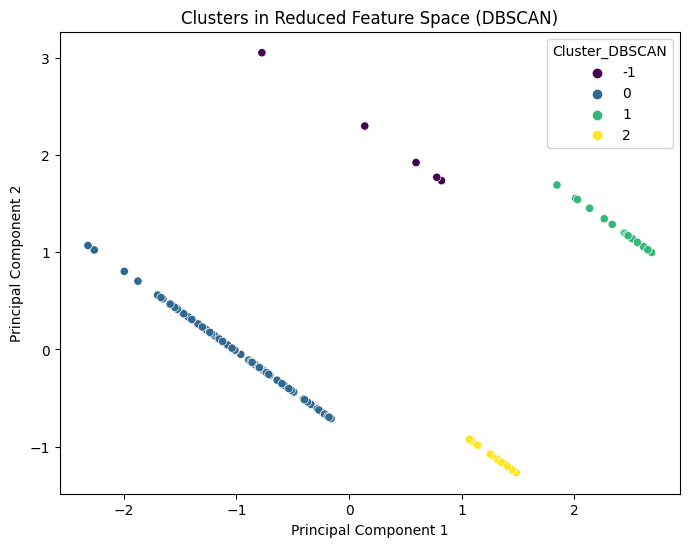

In [ ]:
from sklearn.cluster import DBSCAN

# Visualize clusters with PCA
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(selected_features_scaled)

# Clustering with DBSCAN
dbscan = DBSCAN(eps=1, min_samples=5)
df['Cluster_DBSCAN'] = dbscan.fit_predict(reduced_features)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=reduced_features[:, 0], y=reduced_features[:, 1], hue=df['Cluster_DBSCAN'], palette='viridis', legend='full')
plt.title('Clusters in Reduced Feature Space (DBSCAN)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

### K-Means & VAEs

Epoch 1/50
5/5 [==============================] - 1s 3ms/step - loss: 0.6947
Epoch 2/50
5/5 [==============================] - 0s 3ms/step - loss: 0.6458
Epoch 3/50
5/5 [==============================] - 0s 2ms/step - loss: 0.6307
Epoch 4/50
5/5 [==============================] - 0s 3ms/step - loss: 0.6210
Epoch 5/50
5/5 [==============================] - 0s 3ms/step - loss: 0.5977
Epoch 6/50
5/5 [==============================] - 0s 4ms/step - loss: 0.5609
Epoch 7/50
5/5 [==============================] - 0s 3ms/step - loss: 0.5404
Epoch 8/50
5/5 [==============================] - 0s 3ms/step - loss: 0.5304
Epoch 9/50
5/5 [==============================] - 0s 3ms/step - loss: 0.5163
Epoch 10/50
5/5 [==============================] - 0s 4ms/step - loss: 0.4645
Epoch 11/50
5/5 [==============================] - 0s 3ms/step - loss: 0.4657
Epoch 12/50
5/5 [==============================] - 0s 3ms/step - loss: 0.4416
Epoch 13/50
5/5 [==============================] - 0s 3ms/step - loss: 0.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


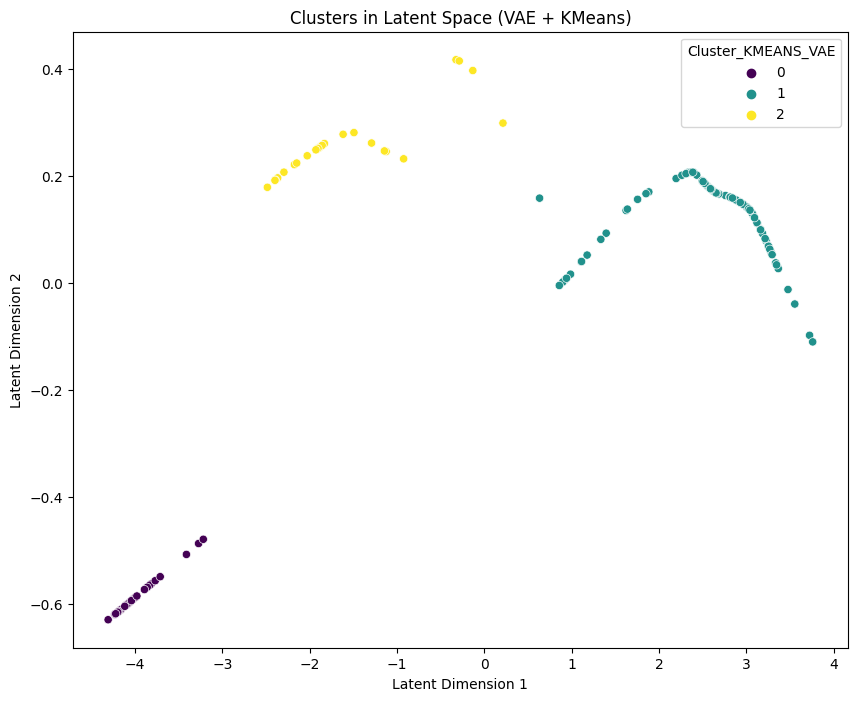

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

# Define the VAE model
original_dim = selected_features_scaled.shape[1]
latent_dim = 2  # Number of latent dimensions

# Encoder
encoder_inputs = tf.keras.Input(shape=(original_dim,))
x = layers.Dense(128, activation='relu')(encoder_inputs)
x = layers.Dense(64, activation='relu')(x)
z_mean = layers.Dense(latent_dim, name='z_mean')(x)
z_log_var = layers.Dense(latent_dim, name='z_log_var')(x)

# Sampling
def sampling(args):
    z_mean, z_log_var = args
    batch = tf.shape(z_mean)[0]
    dim = tf.shape(z_mean)[1]
    epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
    return z_mean + tf.exp(0.5 * z_log_var) * epsilon

z = layers.Lambda(sampling, output_shape=(latent_dim,), name='z')([z_mean, z_log_var])

# Decoder
decoder_h = layers.Dense(64, activation='relu')
decoder_mean = layers.Dense(original_dim, activation='sigmoid')
h_decoded = decoder_h(z)
x_decoded_mean = decoder_mean(h_decoded)

vae = tf.keras.Model(encoder_inputs, x_decoded_mean)

# Compile VAE
xent_loss = tf.keras.losses.binary_crossentropy(encoder_inputs, x_decoded_mean)
kl_loss = - 0.5 * tf.keras.backend.mean(1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var), axis=-1)
vae_loss = xent_loss + kl_loss
vae.add_loss(vae_loss)
vae.compile(optimizer='adam')

# Train the VAE
vae.fit(selected_features_scaled, epochs=50, batch_size=32, verbose=1)

# Use the encoder part to obtain latent representations
encoder = tf.keras.Model(encoder_inputs, z_mean)
latent_representations = encoder.predict(selected_features_scaled)

# Perform clustering (e.g., using KMeans) on the latent representations
n_clusters = 3  # Adjust based on your analysis
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df['Cluster_KMEANS_VAE'] = kmeans.fit_predict(latent_representations)

# Visualize clusters in the latent space
plt.figure(figsize=(10, 8))
sns.scatterplot(x=latent_representations[:, 0], y=latent_representations[:, 1], hue=df['Cluster_KMEANS_VAE'], palette='viridis', legend='full')
plt.title('Clusters in Latent Space (VAE + KMeans)')
plt.xlabel('Latent Dimension 1')
plt.ylabel('Latent Dimension 2')
plt.show()



### DBSCAN & VAEs


Epoch 1/50
5/5 [==============================] - 1s 4ms/step - loss: 0.6180
Epoch 2/50
5/5 [==============================] - 0s 3ms/step - loss: 0.5770
Epoch 3/50
5/5 [==============================] - 0s 4ms/step - loss: 0.5107
Epoch 4/50
5/5 [==============================] - 0s 3ms/step - loss: 0.4349
Epoch 5/50
5/5 [==============================] - 0s 3ms/step - loss: 0.3386
Epoch 6/50
5/5 [==============================] - 0s 3ms/step - loss: 0.1842
Epoch 7/50
5/5 [==============================] - 0s 3ms/step - loss: 0.0327
Epoch 8/50
5/5 [==============================] - 0s 3ms/step - loss: -0.2273
Epoch 9/50
5/5 [==============================] - 0s 3ms/step - loss: -0.5260
Epoch 10/50
5/5 [==============================] - 0s 3ms/step - loss: -0.8682
Epoch 11/50
5/5 [==============================] - 0s 3ms/step - loss: -1.4055
Epoch 12/50
5/5 [==============================] - 0s 4ms/step - loss: -1.9981
Epoch 13/50
5/5 [==============================] - 0s 3ms/step - los

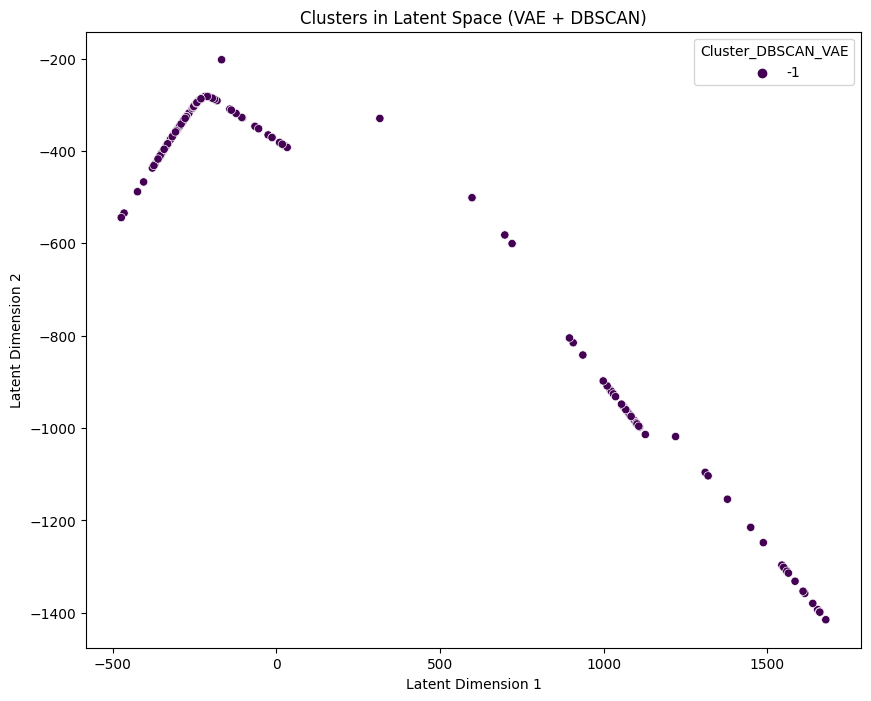

In [ ]:
# Define the VAE model
original_dim = selected_features_scaled.shape[1]
latent_dim = 2  # Number of latent dimensions

# Encoder
encoder_inputs = tf.keras.Input(shape=(original_dim,))
x = layers.Dense(128, activation='relu')(encoder_inputs)
x = layers.Dense(64, activation='relu')(x)
z_mean = layers.Dense(latent_dim, name='z_mean')(x)

# Sampling
def sampling(args):
    z_mean = args
    batch = tf.shape(z_mean)[0]
    dim = tf.shape(z_mean)[1]
    epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
    return z_mean + epsilon

z = layers.Lambda(sampling, output_shape=(latent_dim,), name='z')(z_mean)

# Decoder
decoder_h = layers.Dense(64, activation='relu')
decoder_mean = layers.Dense(original_dim, activation='sigmoid')
h_decoded = decoder_h(z)
x_decoded_mean = decoder_mean(h_decoded)

vae = tf.keras.Model(encoder_inputs, x_decoded_mean)

# Compile VAE
xent_loss = tf.keras.losses.binary_crossentropy(encoder_inputs, x_decoded_mean)
vae_loss = xent_loss
vae.add_loss(vae_loss)
vae.compile(optimizer='adam')

# Train the VAE
vae.fit(selected_features_scaled, epochs=50, batch_size=32, verbose=1)

# Use the encoder part to obtain latent representations
encoder = tf.keras.Model(encoder_inputs, z_mean)
latent_representations = encoder.predict(selected_features_scaled)

# Use DBSCAN on the latent representations
dbscan = DBSCAN(eps=0.5, min_samples=5)
df['Cluster_DBSCAN_VAE'] = dbscan.fit_predict(latent_representations)

# Visualize clusters in the latent space
plt.figure(figsize=(10, 8))
sns.scatterplot(x=latent_representations[:, 0], y=latent_representations[:, 1], hue=df['Cluster_DBSCAN_VAE'], palette='viridis', legend='full')
plt.title('Clusters in Latent Space (VAE + DBSCAN)')
plt.xlabel('Latent Dimension 1')
plt.ylabel('Latent Dimension 2')
plt.show()

## 3. SURVIVAL FUNCTION

In [ ]:
!pip install lifelines

### Kaplan-Meier

In [ ]:
from lifelines import KaplanMeierFitter

#### K-Means & PCA

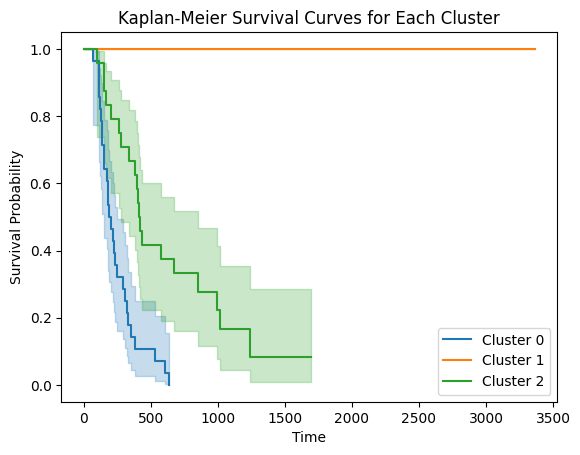

In [ ]:
# Perform Kaplan-Meier survival analysis for each cluster
kmf = KaplanMeierFitter()

for cluster in range(n_clusters):
    cluster_data = df[df['Cluster_KMEANS'] == cluster]
    kmf.fit(durations=cluster_data['survival_time'], event_observed=cluster_data['survival_status'])
    kmf.plot_survival_function(label=f'Cluster {cluster}')
    plt.title('Kaplan-Meier Survival Curves for Each Cluster')
    plt.xlabel('Time')
    plt.ylabel('Survival Probability')
    plt.legend()

# Show the plot
plt.show()



#### K-Means & VAEs

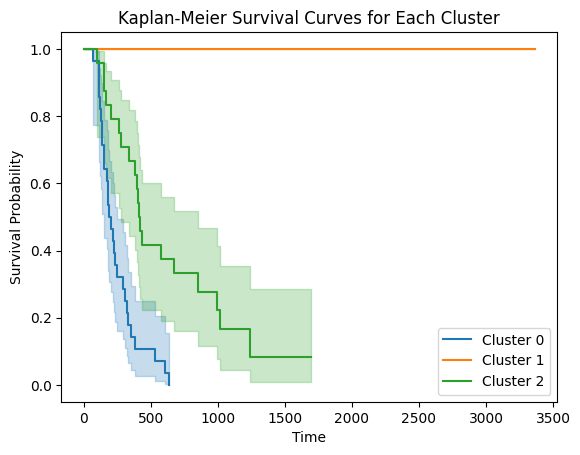

In [ ]:
# Perform Kaplan-Meier survival analysis for each cluster
kmf = KaplanMeierFitter()

for cluster in range(n_clusters):
    cluster_data = df[df['Cluster_KMEANS_VAE'] == cluster]
    kmf.fit(durations=cluster_data['survival_time'], event_observed=cluster_data['survival_status'])
    kmf.plot_survival_function(label=f'Cluster {cluster}')
    plt.title('Kaplan-Meier Survival Curves for Each Cluster')
    plt.xlabel('Time')
    plt.ylabel('Survival Probability')
    plt.legend()

# Show the plot
plt.show()

#### DBSCAN & PCA

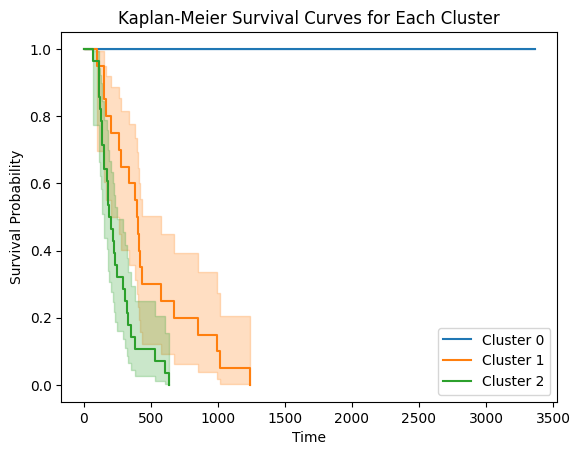

In [ ]:
# Perform Kaplan-Meier survival analysis for each cluster
kmf = KaplanMeierFitter()

for cluster in range(n_clusters):
    cluster_data = df[df['Cluster_DBSCAN'] == cluster]
    kmf.fit(durations=cluster_data['survival_time'], event_observed=cluster_data['survival_status'])
    kmf.plot_survival_function(label=f'Cluster {cluster}')
    plt.title('Kaplan-Meier Survival Curves for Each Cluster')
    plt.xlabel('Time')
    plt.ylabel('Survival Probability')
    plt.legend()

# Show the plot
plt.show()

#### DBSCAN & VAEs

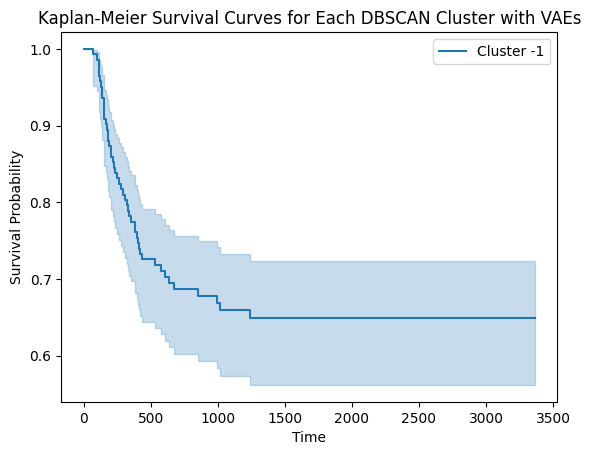

In [ ]:
from lifelines import KaplanMeierFitter

kmf = KaplanMeierFitter()

# Plot survival function for each cluster
for cluster in df['Cluster_DBSCAN_VAE'].unique():
    cluster_data = df[df['Cluster_DBSCAN_VAE'] == cluster]
    kmf.fit(durations=cluster_data['survival_time'], event_observed=cluster_data['survival_status'])
    kmf.plot_survival_function(label=f'Cluster {cluster}')



plt.title('Kaplan-Meier Survival Curves for Each DBSCAN Cluster with VAEs')
plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.legend()
plt.show()



### Cox Regression

In [ ]:
from lifelines import CoxPHFitter

In [ ]:
df.columns

Index(['Donorage', 'Recipientage', 'CD34kgx10d6', 'CD3dCD34', 'CD3dkgx10d8',
       'Rbodymass', 'ANCrecovery', 'PLTrecovery', 'time_to_aGvHD_III_IV',
       'survival_time', 'survival_status', 'Recipientgender_b'1'',
       'Stemcellsource_b'1'', 'Donorage35_b'1'', 'IIIV_b'1'',
       'Gendermatch_b'1'', 'DonorABO_b'0'', 'DonorABO_b'1'', 'DonorABO_b'2'',
       'RecipientABO_b'0'', 'RecipientABO_b'1'', 'RecipientABO_b'2'',
       'RecipientRh_b'1'', 'ABOmatch_b'1'', 'CMVstatus_b'1'', 'CMVstatus_b'2'',
       'CMVstatus_b'3'', 'DonorCMV_b'1'', 'RecipientCMV_b'1'',
       'Disease_b'AML'', 'Disease_b'chronic'', 'Disease_b'lymphoma'',
       'Disease_b'nonmalignant'', 'Riskgroup_b'1'', 'Txpostrelapse_b'1'',
       'Diseasegroup_b'1'', 'HLAmatch_b'1'', 'HLAmatch_b'2'', 'HLAmatch_b'3'',
       'HLAmismatch_b'1'', 'Antigen_b'0'', 'Antigen_b'1'', 'Antigen_b'2'',
       'Alel_b'0'', 'Alel_b'1'', 'Alel_b'2'', 'Alel_b'3'', 'HLAgrI_b'1'',
       'HLAgrI_b'2'', 'HLAgrI_b'3'', 'HLAgrI_b'4'', 'HLAg

#### K-Means & PCA

In [ ]:
df['Cluster_KMEANS'].unique()

array([1, 2, 0], dtype=int32)

Let us make a copy of the original dataframe because we will need it afterwards for each clustering group. We drop columns of other clusters other than one needed

In [ ]:
original_df = df.copy()

# Exclude columns related to clusters other than 'Cluster_KMEANS'
df = df.drop(['Cluster_DBSCAN', 'Cluster_KMEANS_VAE', 'Cluster_DBSCAN_VAE'], axis=1)


In [ ]:
df.columns

Index(['Donorage', 'Recipientage', 'CD34kgx10d6', 'CD3dCD34', 'CD3dkgx10d8',
       'Rbodymass', 'ANCrecovery', 'PLTrecovery', 'time_to_aGvHD_III_IV',
       'survival_time', 'survival_status', 'Recipientgender_b'1'',
       'Stemcellsource_b'1'', 'Donorage35_b'1'', 'IIIV_b'1'',
       'Gendermatch_b'1'', 'DonorABO_b'0'', 'DonorABO_b'1'', 'DonorABO_b'2'',
       'RecipientABO_b'0'', 'RecipientABO_b'1'', 'RecipientABO_b'2'',
       'RecipientRh_b'1'', 'ABOmatch_b'1'', 'CMVstatus_b'1'', 'CMVstatus_b'2'',
       'CMVstatus_b'3'', 'DonorCMV_b'1'', 'RecipientCMV_b'1'',
       'Disease_b'AML'', 'Disease_b'chronic'', 'Disease_b'lymphoma'',
       'Disease_b'nonmalignant'', 'Riskgroup_b'1'', 'Txpostrelapse_b'1'',
       'Diseasegroup_b'1'', 'HLAmatch_b'1'', 'HLAmatch_b'2'', 'HLAmatch_b'3'',
       'HLAmismatch_b'1'', 'Antigen_b'0'', 'Antigen_b'1'', 'Antigen_b'2'',
       'Alel_b'0'', 'Alel_b'1'', 'Alel_b'2'', 'Alel_b'3'', 'HLAgrI_b'1'',
       'HLAgrI_b'2'', 'HLAgrI_b'3'', 'HLAgrI_b'4'', 'HLAg

      Donorage  Recipientage  CD34kgx10d6   CD3dCD34  CD3dkgx10d8  Rbodymass  \
0    22.830137           9.6         7.20   1.338760         5.38       35.0   
1    23.342466           4.0         4.50  11.078295         0.41       20.6   
2    26.394521           6.6         7.94  19.013230         0.42       23.4   
4    33.358904           1.3        51.85   3.972255        13.05        9.0   
8    32.641096           7.9        23.54   3.772555         6.24       20.5   
..         ...           ...          ...        ...          ...        ...   
179  30.024658           7.5         8.11  16.326160         0.50       28.0   
182  37.575342          12.9        11.08   2.522750         4.39       44.0   
183  22.895890          13.9         4.64   1.038858         4.47       44.5   
184  27.347945          10.4         7.73   1.635559         4.73       33.0   
185  27.780822           8.0        15.41   8.077770         1.91       24.0   

     ANCrecovery  PLTrecovery  time_to_

/usr/local/lib/python3.10/dist-packages/lifelines/utils/__init__.py:1122: ConvergenceWarning: Column Alel_b'2' have very low variance when conditioned on death event present or not. This may harm convergence. This could be a form of 'complete separation'. For example, try the following code:

>>> events = df['survival_status'].astype(bool)
>>> print(df.loc[events, 'Alel_b'2''].var())
>>> print(df.loc[~events, 'Alel_b'2''].var())

A very low variance means that the column Alel_b'2' completely determines whether a subject dies or not. See https://stats.stackexchange.com/questions/11109/how-to-deal-with-perfect-separation-in-logistic-regression.

  warnings.warn(dedent(warning_text), ConvergenceWarning)
/usr/local/lib/python3.10/dist-packages/lifelines/fitters/coxph_fitter.py:1614: ConvergenceWarning: Newton-Raphson failed to converge sufficiently. Please see the following tips in the lifelines documentation: https://lifelines.readthedocs.io/en/latest/Examples.html#problems-with-convergen

<lifelines.CoxPHFitter: fitted with 142 total observations, 94 right-censored observations>
             duration col = 'survival_time'
                event col = 'survival_status'
                penalizer = 0.1
                 l1 ratio = 0.0
      baseline estimation = breslow
   number of observations = 142
number of events observed = 48
   partial log-likelihood = -259.71
         time fit was run = 2023-11-23 10:56:04 UTC

---
                          coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                       
Donorage                  0.01       1.01       0.03            -0.04             0.06                 0.96                 1.07
Recipientage              0.00       1.00       0.04            -0.09             0.09                 0.92                 1.09
CD34kgx10d6               0.01       1.01       0.02            -0.03             0.06                 0.97                 1.06
CD3dCD34                  0.00       1.00       0.02            -0.03             0.04                 0.97                 1.04
CD3dkgx10d8              -0.06       0.94       0.06            -0.17             0.05                 0.84                 1.05
Rbodymass                 0.01       1.01       0.01            -0.02             0.03                 0.98                 1.03
ANCrecovery               0.00       1.00       0.07            -0.13             0.14                 0.88                 1.15
PLTrecovery               0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
time_to_aGvHD_III_IV      0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
Recipientgender_b'1'     -0.16       0.86       0.38            -0.91             0.59                 0.40                 1.81
Stemcellsource_b'1'       0.20       1.22       0.50            -0.78             1.17                 0.46                 3.23
Donorage35_b'1'           0.03       1.03       0.41            -0.77             0.83                 0.46                 2.29
IIIV_b'1'                 0.07       1.07       0.39            -0.70             0.83                 0.50                 2.30
Gendermatch_b'1'          0.22       1.25       0.51            -0.77             1.21                 0.46                 3.37
DonorABO_b'0'             0.06       1.06       0.40            -0.73             0.85                 0.48                 2.33
DonorABO_b'1'             0.24       1.27       0.40            -0.54             1.03                 0.58                 2.79
DonorABO_b'2'            -0.86       0.42       0.78            -2.39             0.67                 0.09                 1.96
RecipientABO_b'0'        -0.32       0.73       0.44            -1.18             0.55                 0.31                 1.73
RecipientABO_b'1'        -0.07       0.94       0.39            -0.82             0.69                 0.44                 2.00
RecipientABO_b'2'         0.04       1.05       0.68            -1.29             1.37                 0.28                 3.95
RecipientRh_b'1'          0.68       1.98       0.48            -0.26             1.62                 0.77                 5.06
ABOmatch_b'1'            -0.02       0.98       0.39            -0.79             0.75                 0.45                 2.11
CMVstatus_b'1'           -0.38       0.69       0.59            -1.53             0.78                 0.22                 2.17
CMVstatus_b'2'           -0.19       0.83       0.43            -1.04             0.66                 0.35                 1.94
CMVstatus_b'3'            0.08       1.08       0.48            -0.87             1.02                 0.42                 2.79
DonorCMV_b'1'            -0.16       0.85       0.43            -1.01          

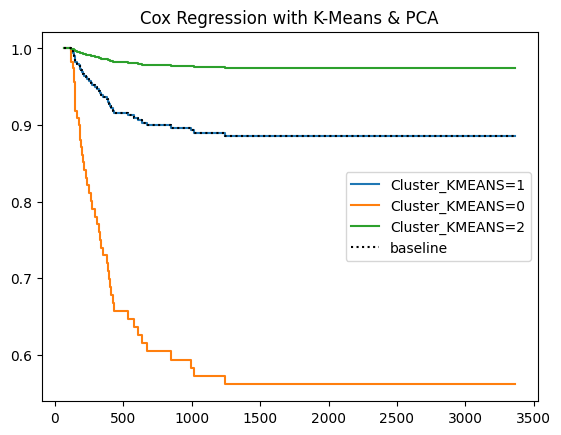

In [ ]:
cluster_data = df[df['Cluster_KMEANS'].isin([1, 0, 2])]
print(cluster_data)
cph = CoxPHFitter(penalizer=0.1)
cph.fit(cluster_data, duration_col='survival_time', event_col='survival_status')

# Display Cox Regression summary for the current cluster
print(f"Cluster {cluster_data} Cox Regression Summary:")
cph.print_summary()

# You can also plot the survival function for the current cluster
cph.plot_partial_effects_on_outcome(covariates='Cluster_KMEANS', values=[1, 0, 2])
plt.title('Cox Regression with K-Means & PCA')
plt.show()


#### K-Means & VAEs

In [ ]:
# Revert to the original DataFrame
df = original_df

# Exclude columns related to clusters other than 'Cluster_KMEANS_VAE'
df = df.drop(['Cluster_KMEANS', 'Cluster_DBSCAN', 'Cluster_DBSCAN_VAE'], axis=1)


In [ ]:
df['Cluster_KMEANS_VAE'].unique()


array([1, 2, 0], dtype=int32)

/usr/local/lib/python3.10/dist-packages/lifelines/utils/__init__.py:1122: ConvergenceWarning: Column Alel_b'2' have very low variance when conditioned on death event present or not. This may harm convergence. This could be a form of 'complete separation'. For example, try the following code:

>>> events = df['survival_status'].astype(bool)
>>> print(df.loc[events, 'Alel_b'2''].var())
>>> print(df.loc[~events, 'Alel_b'2''].var())

A very low variance means that the column Alel_b'2' completely determines whether a subject dies or not. See https://stats.stackexchange.com/questions/11109/how-to-deal-with-perfect-separation-in-logistic-regression.

  warnings.warn(dedent(warning_text), ConvergenceWarning)
/usr/local/lib/python3.10/dist-packages/lifelines/fitters/coxph_fitter.py:1614: ConvergenceWarning: Newton-Raphson failed to converge sufficiently. Please see the following tips in the lifelines documentation: https://lifelines.readthedocs.io/en/latest/Examples.html#problems-with-convergen

<lifelines.CoxPHFitter: fitted with 142 total observations, 94 right-censored observations>
             duration col = 'survival_time'
                event col = 'survival_status'
                penalizer = 0.1
                 l1 ratio = 0.0
      baseline estimation = breslow
   number of observations = 142
number of events observed = 48
   partial log-likelihood = -259.71
         time fit was run = 2023-11-23 10:56:07 UTC

---
                          coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                       
Donorage                  0.01       1.01       0.03            -0.04             0.06                 0.96                 1.07
Recipientage              0.00       1.00       0.04            -0.09             0.09                 0.92                 1.09
CD34kgx10d6               0.01       1.01       0.02            -0.03             0.06                 0.97                 1.06
CD3dCD34                  0.00       1.00       0.02            -0.03             0.04                 0.97                 1.04
CD3dkgx10d8              -0.06       0.94       0.06            -0.17             0.05                 0.84                 1.05
Rbodymass                 0.01       1.01       0.01            -0.02             0.03                 0.98                 1.03
ANCrecovery               0.00       1.00       0.07            -0.13             0.14                 0.88                 1.15
PLTrecovery               0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
time_to_aGvHD_III_IV      0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
Recipientgender_b'1'     -0.16       0.86       0.38            -0.91             0.59                 0.40                 1.81
Stemcellsource_b'1'       0.20       1.22       0.50            -0.78             1.17                 0.46                 3.23
Donorage35_b'1'           0.03       1.03       0.41            -0.77             0.83                 0.46                 2.29
IIIV_b'1'                 0.07       1.07       0.39            -0.70             0.83                 0.50                 2.30
Gendermatch_b'1'          0.22       1.25       0.51            -0.77             1.21                 0.46                 3.37
DonorABO_b'0'             0.06       1.06       0.40            -0.73             0.85                 0.48                 2.33
DonorABO_b'1'             0.24       1.27       0.40            -0.54             1.03                 0.58                 2.79
DonorABO_b'2'            -0.86       0.42       0.78            -2.39             0.67                 0.09                 1.96
RecipientABO_b'0'        -0.32       0.73       0.44            -1.18             0.55                 0.31                 1.73
RecipientABO_b'1'        -0.07       0.94       0.39            -0.82             0.69                 0.44                 2.00
RecipientABO_b'2'         0.04       1.05       0.68            -1.29             1.37                 0.28                 3.95
RecipientRh_b'1'          0.68       1.98       0.48            -0.26             1.62                 0.77                 5.06
ABOmatch_b'1'            -0.02       0.98       0.39            -0.79             0.75                 0.45                 2.11
CMVstatus_b'1'           -0.38       0.69       0.59            -1.53             0.78                 0.22                 2.17
CMVstatus_b'2'           -0.19       0.83       0.43            -1.04             0.66                 0.35                 1.94
CMVstatus_b'3'            0.08       1.08       0.48            -0.87             1.02                 0.42                 2.79
DonorCMV_b'1'            -0.16       0.85       0.43            -1.01          

Feature Importance from Cox Regression:
covariate
Alel_b'3'                  9.262056e+00
HLAmatch_b'3'              2.661806e+00
HLAgrI_b'7'                2.661806e+00
Relapse_b'1'               2.593476e+00
RecipientRh_b'1'           6.828794e-01
Disease_b'lymphoma'        6.462979e-01
HLAgrI_b'3'                5.368028e-01
Antigen_b'0'               3.767584e-01
Riskgroup_b'1'             3.264988e-01
HLAgrI_b'5'                3.050127e-01
Txpostrelapse_b'1'         3.025998e-01
HLAmismatch_b'1'           2.465819e-01
DonorABO_b'1'              2.427289e-01
Gendermatch_b'1'           2.235803e-01
Stemcellsource_b'1'        1.982159e-01
Disease_b'chronic'         1.859147e-01
CMVstatus_b'3'             7.941994e-02
Diseasegroup_b'1'          6.882194e-02
IIIV_b'1'                  6.620311e-02
DonorABO_b'0'              5.872771e-02
Recipientageint_b'1'       5.353572e-02
RecipientABO_b'2'          4.409383e-02
Alel_b'0'                  4.405628e-02
Donorage35_b'1'            2.8

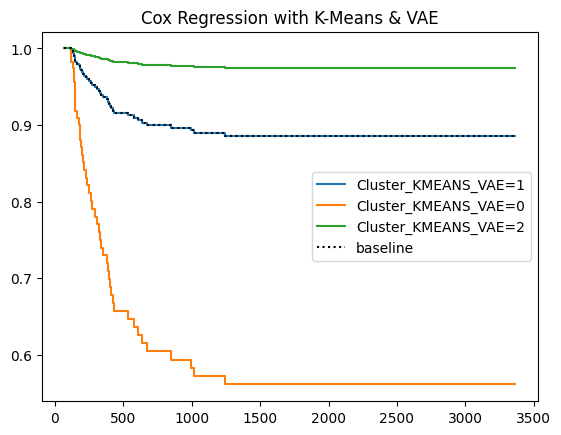

In [ ]:
cluster_data = df[df['Cluster_KMEANS_VAE'].isin([1, 0, 2])]
cph = CoxPHFitter(penalizer=0.1)
cph.fit(cluster_data, duration_col='survival_time', event_col='survival_status')
cph.print_summary()

# Analyze the feature importance from Cox Regression
feature_importance = cph.summary['coef'].sort_values(ascending=False)
print("Feature Importance from Cox Regression:")
print(feature_importance)

# Plot the survival function for the current cluster
cph.plot_partial_effects_on_outcome(covariates='Cluster_KMEANS_VAE', values=[1, 0, 2])
plt.title('Cox Regression with K-Means & VAE')
plt.show()


#### DBSCAN & PCA

In [ ]:
# Revert to the original DataFrame
df = original_df

# Exclude columns related to clusters other than 'Cluster_DBSCAN'
df = df.drop(['Cluster_KMEANS', 'Cluster_KMEANS_VAE', 'Cluster_DBSCAN_VAE'], axis=1)
df.columns

Index(['Donorage', 'Recipientage', 'CD34kgx10d6', 'CD3dCD34', 'CD3dkgx10d8',
       'Rbodymass', 'ANCrecovery', 'PLTrecovery', 'time_to_aGvHD_III_IV',
       'survival_time', 'survival_status', 'Recipientgender_b'1'',
       'Stemcellsource_b'1'', 'Donorage35_b'1'', 'IIIV_b'1'',
       'Gendermatch_b'1'', 'DonorABO_b'0'', 'DonorABO_b'1'', 'DonorABO_b'2'',
       'RecipientABO_b'0'', 'RecipientABO_b'1'', 'RecipientABO_b'2'',
       'RecipientRh_b'1'', 'ABOmatch_b'1'', 'CMVstatus_b'1'', 'CMVstatus_b'2'',
       'CMVstatus_b'3'', 'DonorCMV_b'1'', 'RecipientCMV_b'1'',
       'Disease_b'AML'', 'Disease_b'chronic'', 'Disease_b'lymphoma'',
       'Disease_b'nonmalignant'', 'Riskgroup_b'1'', 'Txpostrelapse_b'1'',
       'Diseasegroup_b'1'', 'HLAmatch_b'1'', 'HLAmatch_b'2'', 'HLAmatch_b'3'',
       'HLAmismatch_b'1'', 'Antigen_b'0'', 'Antigen_b'1'', 'Antigen_b'2'',
       'Alel_b'0'', 'Alel_b'1'', 'Alel_b'2'', 'Alel_b'3'', 'HLAgrI_b'1'',
       'HLAgrI_b'2'', 'HLAgrI_b'3'', 'HLAgrI_b'4'', 'HLAg

In [ ]:
df['Cluster_DBSCAN'].unique()


array([ 0,  1,  2, -1])

/usr/local/lib/python3.10/dist-packages/lifelines/utils/__init__.py:1122: ConvergenceWarning: Column Alel_b'2' have very low variance when conditioned on death event present or not. This may harm convergence. This could be a form of 'complete separation'. For example, try the following code:

>>> events = df['survival_status'].astype(bool)
>>> print(df.loc[events, 'Alel_b'2''].var())
>>> print(df.loc[~events, 'Alel_b'2''].var())

A very low variance means that the column Alel_b'2' completely determines whether a subject dies or not. See https://stats.stackexchange.com/questions/11109/how-to-deal-with-perfect-separation-in-logistic-regression.

  warnings.warn(dedent(warning_text), ConvergenceWarning)
/usr/local/lib/python3.10/dist-packages/lifelines/fitters/coxph_fitter.py:1614: ConvergenceWarning: Newton-Raphson failed to converge sufficiently. Please see the following tips in the lifelines documentation: https://lifelines.readthedocs.io/en/latest/Examples.html#problems-with-convergen

<lifelines.CoxPHFitter: fitted with 142 total observations, 94 right-censored observations>
             duration col = 'survival_time'
                event col = 'survival_status'
                penalizer = 0.1
                 l1 ratio = 0.0
      baseline estimation = breslow
   number of observations = 142
number of events observed = 48
   partial log-likelihood = -212.19
         time fit was run = 2023-11-23 10:56:10 UTC

---
                          coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                       
Donorage                  0.02       1.02       0.03            -0.03             0.07                 0.97                 1.07
Recipientage             -0.01       0.99       0.04            -0.09             0.08                 0.91                 1.08
CD34kgx10d6               0.01       1.01       0.02            -0.03             0.06                 0.97                 1.06
CD3dCD34                 -0.00       1.00       0.02            -0.04             0.03                 0.96                 1.03
CD3dkgx10d8              -0.07       0.94       0.05            -0.17             0.04                 0.84                 1.04
Rbodymass                 0.00       1.00       0.01            -0.02             0.03                 0.98                 1.03
ANCrecovery              -0.00       1.00       0.06            -0.13             0.12                 0.88                 1.13
PLTrecovery               0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
time_to_aGvHD_III_IV      0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
Recipientgender_b'1'     -0.11       0.90       0.37            -0.83             0.61                 0.44                 1.85
Stemcellsource_b'1'      -0.04       0.96       0.49            -1.00             0.92                 0.37                 2.51
Donorage35_b'1'           0.06       1.06       0.41            -0.74             0.85                 0.48                 2.35
IIIV_b'1'                 0.23       1.26       0.38            -0.51             0.97                 0.60                 2.64
Gendermatch_b'1'          0.22       1.24       0.50            -0.76             1.19                 0.47                 3.30
DonorABO_b'0'             0.19       1.22       0.39            -0.57             0.96                 0.56                 2.61
DonorABO_b'1'             0.16       1.18       0.38            -0.58             0.91                 0.56                 2.49
DonorABO_b'2'            -0.50       0.61       0.77            -2.01             1.01                 0.13                 2.75
RecipientABO_b'0'        -0.21       0.81       0.44            -1.07             0.65                 0.34                 1.91
RecipientABO_b'1'        -0.08       0.93       0.38            -0.82             0.67                 0.44                 1.95
RecipientABO_b'2'        -0.00       1.00       0.66            -1.31             1.30                 0.27                 3.66
RecipientRh_b'1'          0.20       1.23       0.47            -0.71             1.12                 0.49                 3.05
ABOmatch_b'1'             0.12       1.13       0.37            -0.60             0.84                 0.55                 2.33
CMVstatus_b'1'           -0.33       0.72       0.59            -1.49             0.82                 0.23                 2.28
CMVstatus_b'2'           -0.10       0.91       0.42            -0.93             0.73                 0.39                 2.08
CMVstatus_b'3'            0.08       1.09       0.48            -0.85             1.01                 0.43                 2.76
DonorCMV_b'1'            -0.12       0.89       0.43            -0.96          

Feature Importance from Cox Regression:
covariate
Alel_b'3'                  7.747721e+00
HLAgrI_b'7'                2.762070e+00
HLAmatch_b'3'              2.762070e+00
Cluster_DBSCAN             1.719724e+00
Relapse_b'1'               9.467653e-01
HLAgrI_b'3'                4.803995e-01
Antigen_b'2'               3.946000e-01
Antigen_b'0'               2.964648e-01
HLAmismatch_b'1'           2.887296e-01
HLAgrI_b'5'                2.826063e-01
Txpostrelapse_b'1'         2.562461e-01
IIIV_b'1'                  2.298524e-01
Gendermatch_b'1'           2.171598e-01
RecipientRh_b'1'           2.045124e-01
DonorABO_b'0'              1.947607e-01
DonorABO_b'1'              1.645307e-01
Alel_b'0'                  1.523411e-01
Disease_b'lymphoma'        1.349159e-01
ABOmatch_b'1'              1.227956e-01
Riskgroup_b'1'             1.164526e-01
extcGvHD_b'1'              1.076269e-01
Disease_b'chronic'         1.009308e-01
CMVstatus_b'3'             8.201715e-02
Diseasegroup_b'1'          7.3

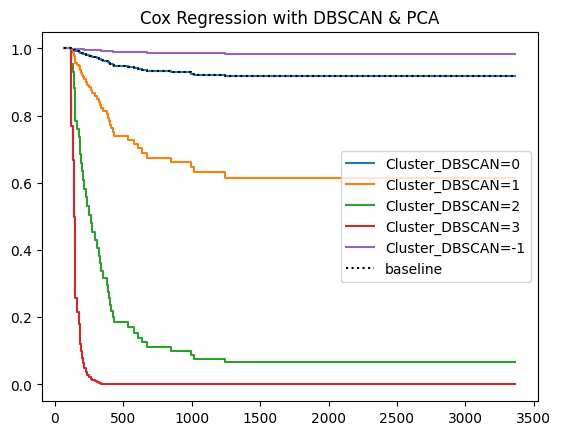

In [ ]:
cluster_data = df[df['Cluster_DBSCAN'].isin([0, 1, 2, 3, -1])]
cph = CoxPHFitter(penalizer=0.1)
cph.fit(cluster_data, duration_col='survival_time', event_col='survival_status')
cph.print_summary()

# Analyze the feature importance from Cox Regression
feature_importance = cph.summary['coef'].sort_values(ascending=False)
print("Feature Importance from Cox Regression:")
print(feature_importance)

# You can also plot the survival function for the current cluster
cph.plot_partial_effects_on_outcome(covariates='Cluster_DBSCAN', values=[0, 1, 2, 3, -1])
plt.title('Cox Regression with DBSCAN & PCA')
plt.show()


### CONCLUSIONS

> Kaplan-Meier:

As we can see for all the methods, we can say that overall, 2 out of the 3 clusters have a low survival probability, while in the Cox regression, usually a minority of clusters have a low survival probability.

> Cox Proportional Hazards Regression:

As we can see from the hazard ratios (exp(coef)) and from the p-values of each variable, we can see that some of the most associated variables to the occurrence of the event are Alel_b'3' and Relapse_b'1', as they have hazard ratios much bigger than 1 and p-values smaller than 0.005. We could say this method is more reliable as it takes into account covariates.